## Análisis exploratorio (Parte 3)

In [102]:
library(ggplot2)
library(dplyr)

In [48]:
movies <- read.csv("movies.csv",header=T,sep=",")

##### Se obtiene un resumen de toda la base con summary para darnos una idea de qué variables son importantes para nuestro análisis y con el str conocemos el tipo de cada una de éstas

In [49]:
summary(movies)

     budget                                            company    
 Min.   :        0   Universal Pictures                    : 302  
 1st Qu.:        0   Warner Bros.                          : 294  
 Median : 11000000   Paramount Pictures                    : 259  
 Mean   : 24581129   Twentieth Century Fox Film Corporation: 205  
 3rd Qu.: 32000000   New Line Cinema                       : 172  
 Max.   :300000000   Columbia Pictures Corporation         : 166  
                     (Other)                               :5422  
      country                  director          genre          gross          
 USA      :4872   Woody Allen      :  33   Comedy   :2080   Min.   :       70  
 UK       : 698   Clint Eastwood   :  24   Drama    :1444   1st Qu.:  1515839  
 France   : 283   Steven Soderbergh:  21   Action   :1331   Median : 12135679  
 Canada   : 150   Steven Spielberg :  21   Crime    : 522   Mean   : 33497829  
 Germany  : 134   Ron Howard       :  20   Adventure: 392   3rd 

In [50]:
str(movies)

'data.frame':	6820 obs. of  15 variables:
 $ budget  : num  8000000 6000000 15000000 18500000 9000000 6000000 25000000 6000000 9000000 15000000 ...
 $ company : Factor w/ 2179 levels "\"DIA\" Productions GmbH & Co. KG",..: 665 1683 1683 2068 2124 1159 1161 763 1683 1936 ...
 $ country : Factor w/ 57 levels "Argentina","Aruba",..: 56 56 56 56 56 54 54 56 56 56 ...
 $ director: Factor w/ 2759 levels "\xc1lex de la Iglesia",..: 2200 1305 2652 1074 2131 1955 1215 594 1011 563 ...
 $ genre   : Factor w/ 17 levels "Action","Adventure",..: 2 5 1 1 2 7 2 7 5 7 ...
 $ gross   : num  5.23e+07 7.01e+07 1.80e+08 8.52e+07 1.86e+07 ...
 $ name    : Factor w/ 6731 levels "'71","'night, Mother",..: 4671 1829 6211 299 1880 3911 2892 784 3969 5313 ...
 $ rating  : Factor w/ 13 levels "B","B15","G",..: 9 8 7 9 7 9 7 9 8 9 ...
 $ released: Factor w/ 2403 levels "1986-01-10","1986-01-17",..: 40 28 24 34 37 76 31 52 10 39 ...
 $ runtime : int  89 103 110 137 90 120 101 120 96 96 ...
 $ score   : num  8.1 7.

In [105]:
# Gráfica Liz Número de películas vs rating




#### Gráfica con el top 5 de países que producen más películas

In [51]:
index1<-which(movies$country==c('USA','UK','France','Canada','Germany'))

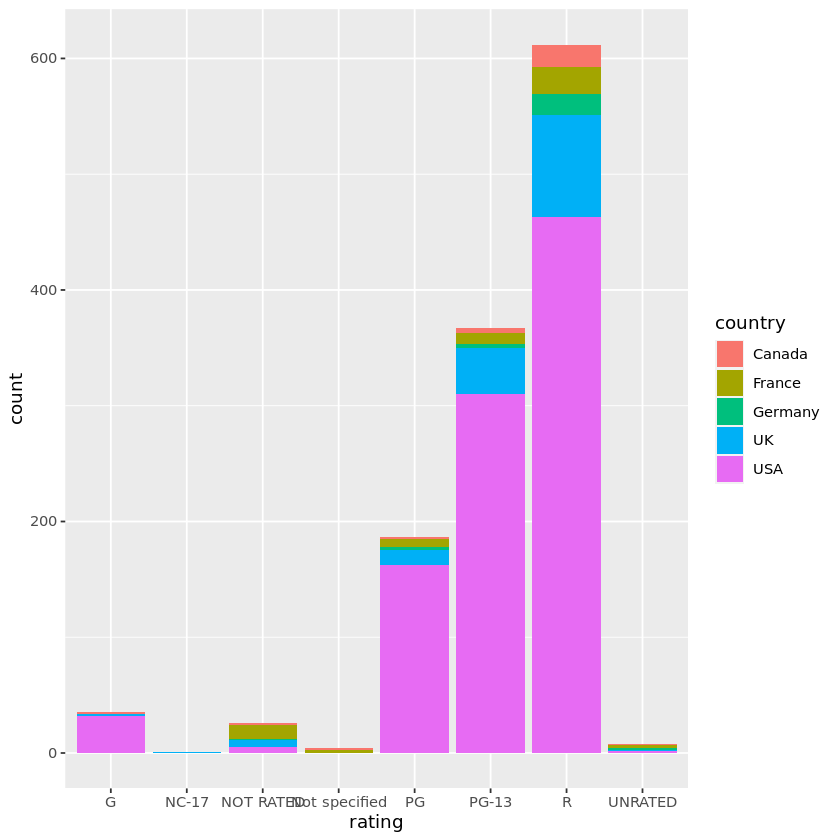

In [52]:
ggplot(data=movies[index1,],aes(x=rating,fill=country))+geom_bar()


Ya habíamos hecho un resumen con la clasificación de las películas pero para entender la magnitud de producción, en ésta gráfica únicamente tomamos el top de los 5 países con mayor producción, pues abarcan un gran porcentaje del total. Con ésto podemos observar que aún comparando a USA contra los países que le preceden en producción tiene un porcentaje muy por encima de la media, especialmente entre las clasificaciones más importantes que son G, PG, PG-13 y R.

#### Aceptación a través de los años

En la siguiente línea creamos dos nuevas variables para un análisis más detallado. Éstas son:

-profit: La definimos como la ganancia. Se obtiene al restar el presupuesto (budget) del total recaudado o ganancia neta(gross)

-choice: Define si la película fue del agrado o no del público. Se define como like si la calificación (score) es mayor o igual al promedio y dislike si es menor.

In [53]:
prof<-data.frame(profit=movies$gross-movies$budget,
                        choice=ifelse(movies$score>=mean(movies$score),'like','dislike'))
movies1<-cbind(movies,prof)
attach(movies1)

The following objects are masked from movies1 (pos = 3):

    budget, choice, company, country, director, genre, gross, name,
    profit, rating, released, runtime, score, star, votes, writer, year




In [106]:
# Gráfica Iván Años vs número de películas






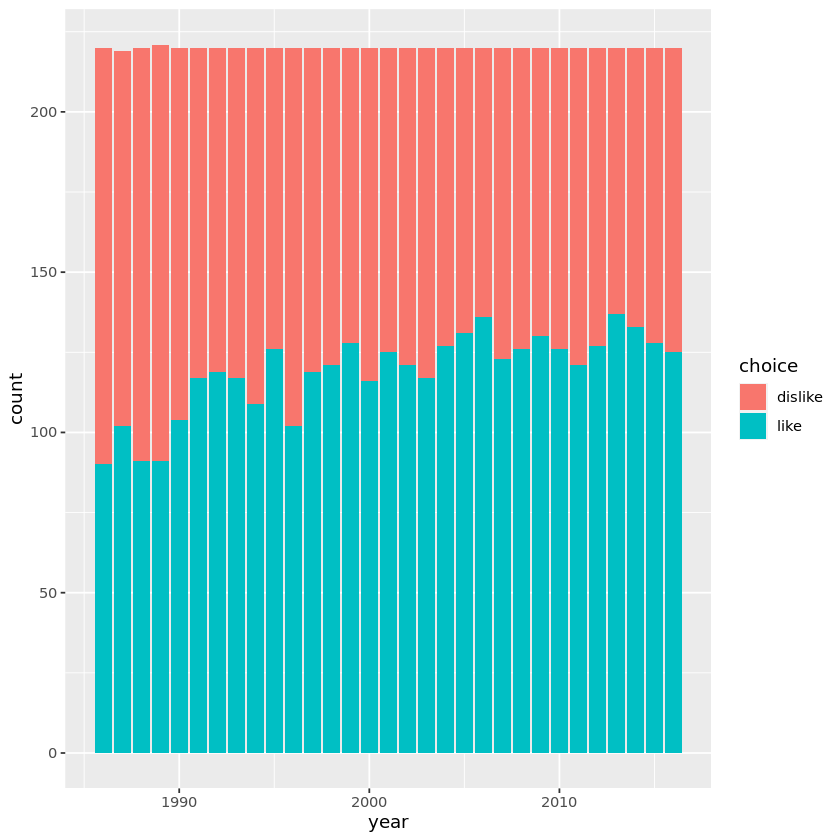

In [54]:
ggplot(data=movies1,aes(x=year,fill=choice))+geom_bar()

En la gráfica previa observamos la producción a través de los años y en ésta se hace una división de esa misma producción pero mostrando la aceptación se ha tenido a través de los años, como podemos ver ha ido en aumento.

In [81]:
#Se toman solo las películas con score mayor al promedio y de los principales géneros
index3<-filter(movies,genre %in% c('Comedy','Drama','Action','Crime','Adventure'),choice=='like')

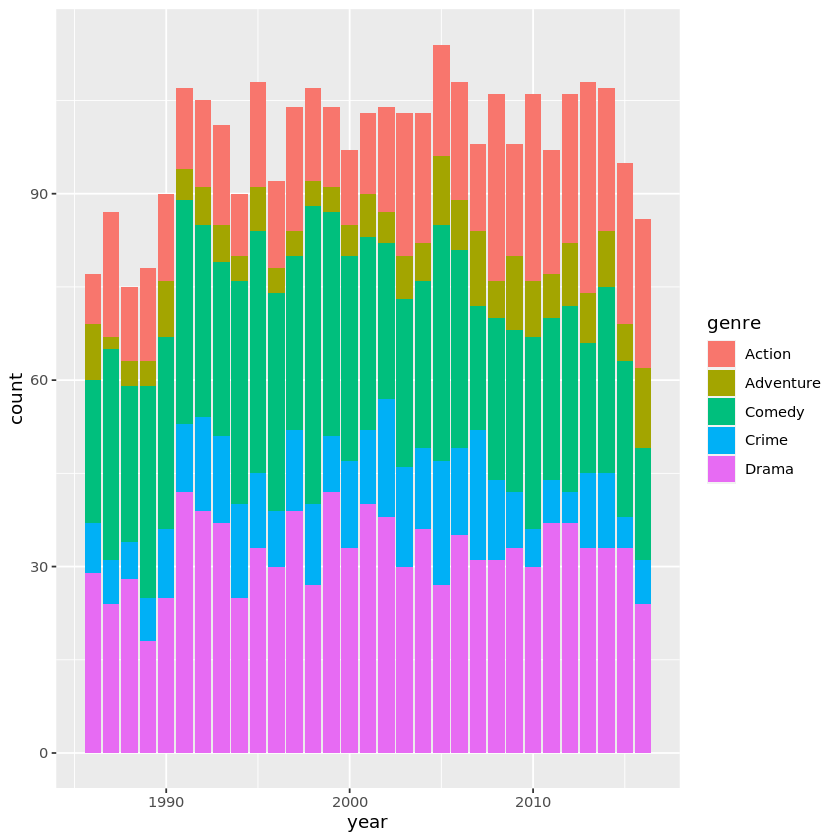

In [80]:
ggplot(data=index3,aes(year,fill=genre))+geom_bar()

Al igual que la gráfica anterior podemos ver la aceptación que va incrementando al pasar de los años y aquí podemos ver la segmentación de estas películas que se encuentran por ecima de la media de calificación. Notamos que la aceptación ha sido mayor en el genero de acción en las últimas décadas y es razonable pues al pasar de los años se han ido mejorando los efectos especiales.

En las películas de drama podemos ver que la aceptación en general no ha cambiado mucho al pasar de los años.

#### Calificación vs votos

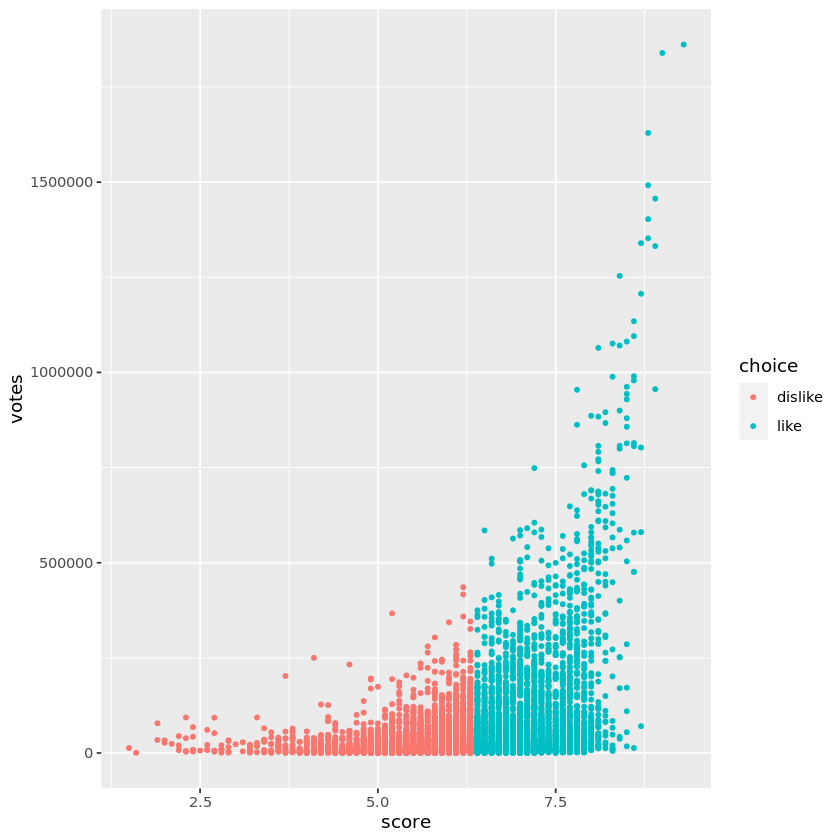

In [46]:
gf<-ggplot(movies1)
gf + geom_point(aes(x=score,y=votes,colour=choice),size=1)

Aquí podemos ver la relación que existe entre la calificación vs el número de votos. La definición de la varibale choice se hizo de acuerdo a la media de la calificación, y éste es el claro diferenciador en la partición de los colores. Podemos ver que para las mejor calificadas también se tiene un mayor número de votos y la dispersión de los datos antes de la media es menor. Por lo que si hay una película mal rankeada fue definida así por un menor número de votos.

#### Densidad de ganancia bruta

In [82]:
index2<-which(genre==c('Comedy','Drama','Action','Crime','Adventure'))

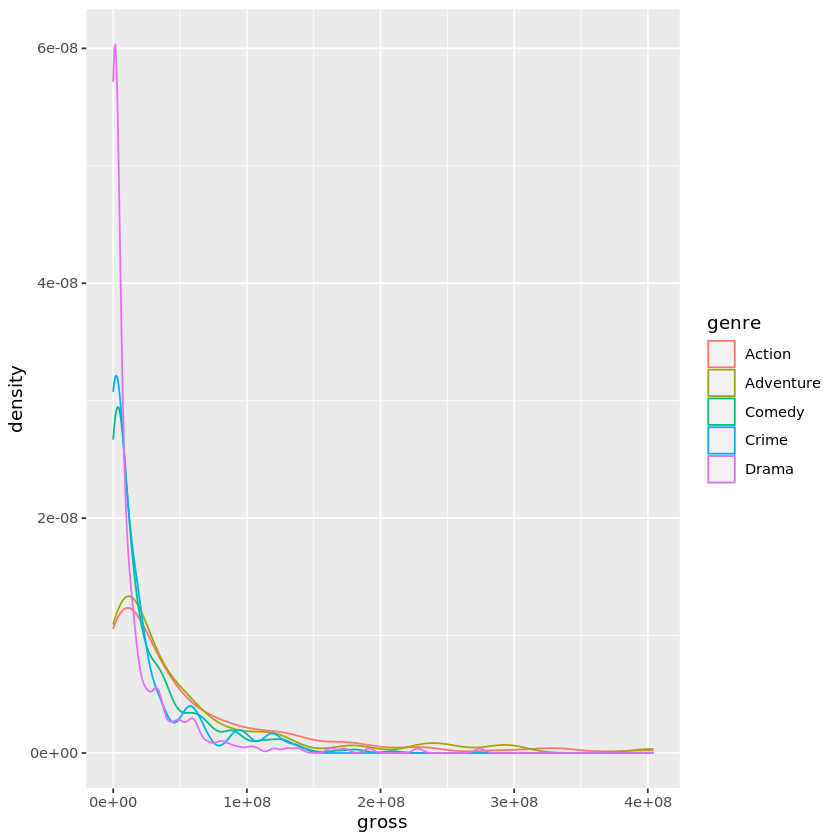

In [88]:
ggplot(movies[index2,]) + geom_density(aes(x = gross, color = genre))

Tomamos los principales géneros para que la gráfica sea más clara y podemos ver que la ganancia bruta tiene un claro sesgo pues la mayoría de las películas no generan ganancias exorbitantes.
Se puede apreciar que las películas de drama son las que tienen un mayor sesgo y por tanto en su mayoría son las que generan una ganancia pequeña y en el lado opuesto se encuentran los géneros de acción y aventura que aunque también se presenta el sesgo tienen una distribución con una curtosis más pequeña.

In [43]:
index4<-filter(movies1,genre %in% c('Comedy','Drama','Action','Crime','Adventure'),budget>=mean(budget))

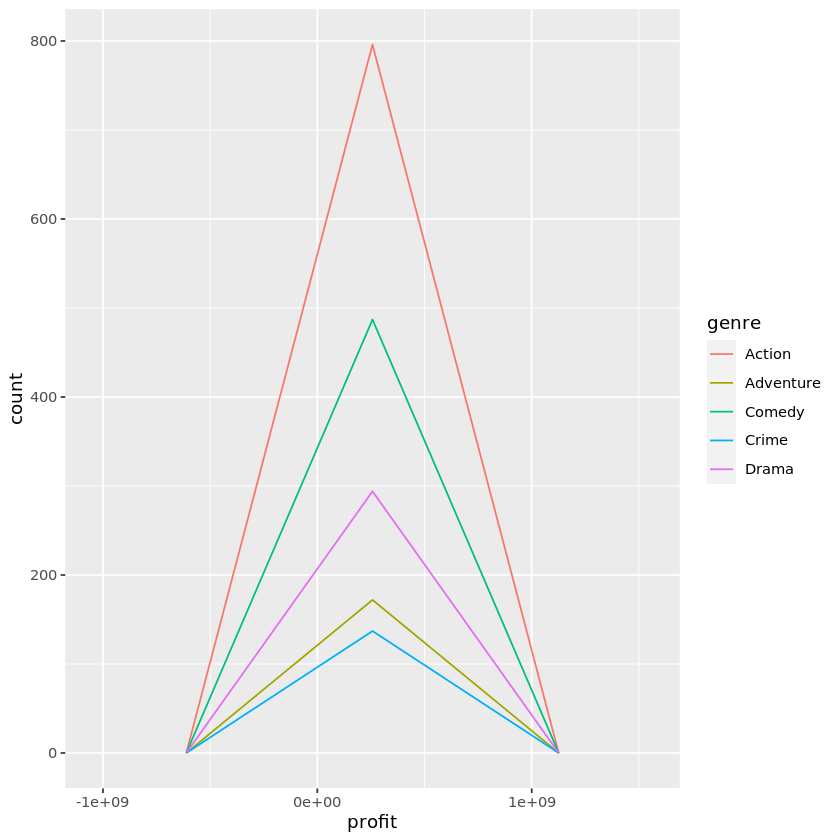

In [93]:
ggplot(data=index4, aes(profit,colour=genre)) +
geom_freqpoly(bins=1) 

Con ésta gráfica observamos que las películas de acción lideran las ganancias netas, aunque el género que se produce más es comedia se encuentra en segundo lugar de ganancias. Y podemos ver que las de crimen fueron las que menos obtuvieron y pensaríamos que no va de acuerdo a las funciones que vimos en la gráfica anterior pero hay que tomar en cuenta que para ésta gráfica se tomaron solamente las películas con un presupuesto mayor a la media y además estamos tomando la variable profit que puede incluir números negativos si el monto invertido o budget fue mayor a las ganancias brutas(gross).

## Análisis de correlación

"En probabilidad y estadística, la correlación indica la fuerza y la dirección de una relación lineal y proporcionalidad entre dos variables estadísticas. Se considera que dos variables cuantitativas están correlacionadas cuando los valores de una de ellas varían sistemáticamente con respecto a los valores homónimos de la otra: si tenemos dos variables (A y B) existe correlación entre ellas si al disminuir los valores de A lo hacen también los de B y viceversa. La correlación entre dos variables no implica, por sí misma, ninguna relación de causalidad"$^1$

$^1$
https://es.wikipedia.org/wiki/Correlaci%C3%B3n

Decidimos utilizar este tipo de análisis en nuestros datos porque nuestras variables pueden arrojar información relevante si es que hubiera alguna relación fuerte o importante entre ellas, a continuación veremos lo que arrojan.

In [ ]:
## 3 Gráficas Iván




ggcorr(movies,geom = "text",low = "darkturquoise",high = "brown4",mid = "moccasin")

Podemos hacer una transformación de las variables con la función logaritmo y visualizar la gráfica anterior con ésta nueva transformación. A diferencia de la gráfica de gross vs budget, ya que el mínimo de budget era cero y no podemos realizar esta transformación.

`geom_smooth()` using formula 'y ~ x'



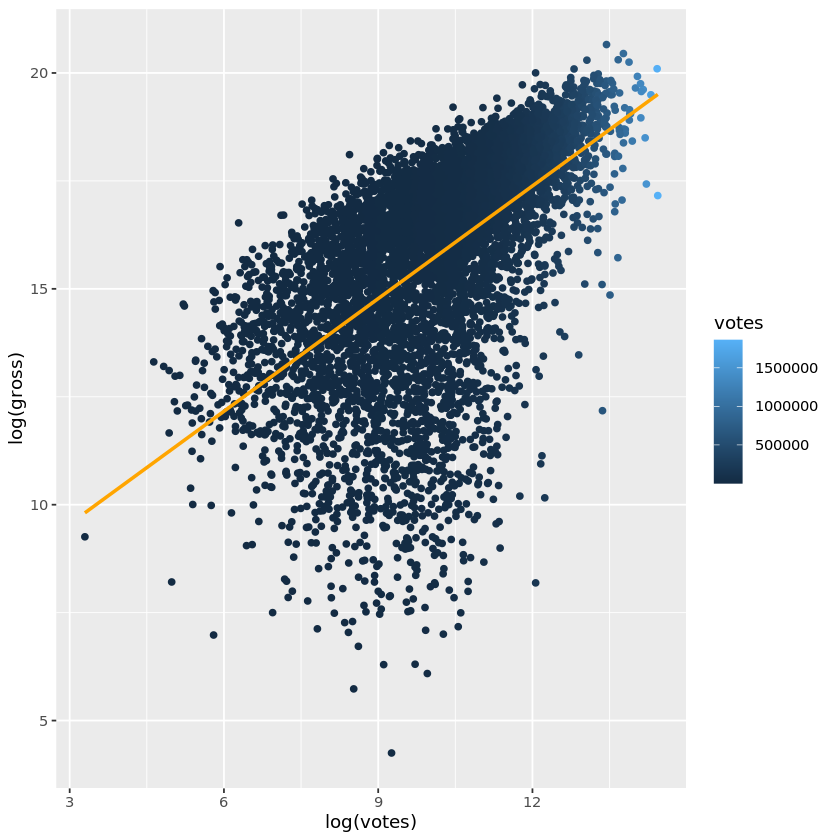

In [133]:
ggplot(data=movies,aes(log(votes),log(gross),col=votes))+
    geom_point()+
    geom_smooth(method=lm , color="orange", se=FALSE)

In [136]:
cor(log(votes),log(gross))

[1] 0.5829657

En ésta gráfica la tendencia que siguen los datos se pueden visualizar mejor por el rango que cambia con la transformación, al parecer siguen una línea más clara pero hay una dispersión importante que se observa por debajo de la línea de tendencia. 

#### Ganancia neta vs bruta

A continuación hacemos el análisis de una de las variables que definimos y una de nuestra base original. Podríamos pensar que si vemos mucha ganancia bruta es una buena señal pero analicemos qué pasa con la ganacia neta.

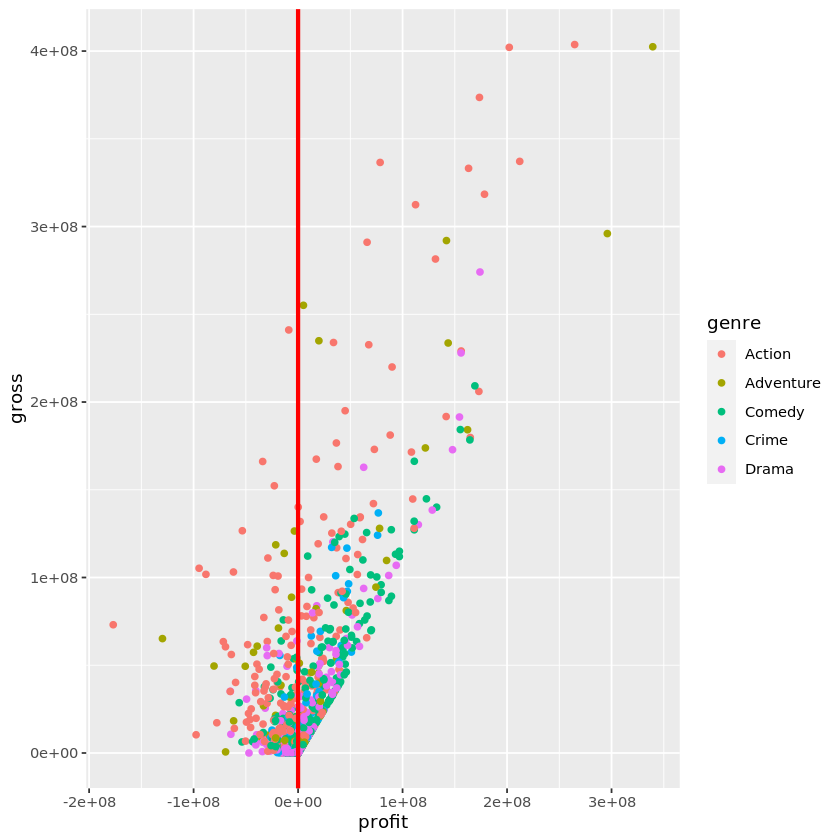

In [154]:
ggplot(data=movies1[index2,],aes(profit,gross,col=genre))+
    geom_point()+
     geom_vline(xintercept=0,col='red',size=1.2)

In [116]:
cor(profit,gross)

[1] 0.7745993

En la gráfica observamos que efectivamente las dos variables por ser ganancias siguen la misma tendencia y su correlación es muy buena, la mejor de todas las que hemos hecho porque tiene un valor de 0.77. 

Ahora que si hacemos el análsis de si se está obteniendo una ganancia real podemos ver con la línea vertical que muchos de los datos se encuentran del lado izquierdo, lo que nos dice que están en números rojos, es decir, gastaron más de lo que ganaron, pues después de restar el presupuesto no hubo ganancia neta. De igual forma hay muchos datos cercanos a ésta línea aún estando del lado derecho, esto indica que casi no obtuvieron ganancia. 

#### ¿Las ganancias netas van de la mano con la calificación?

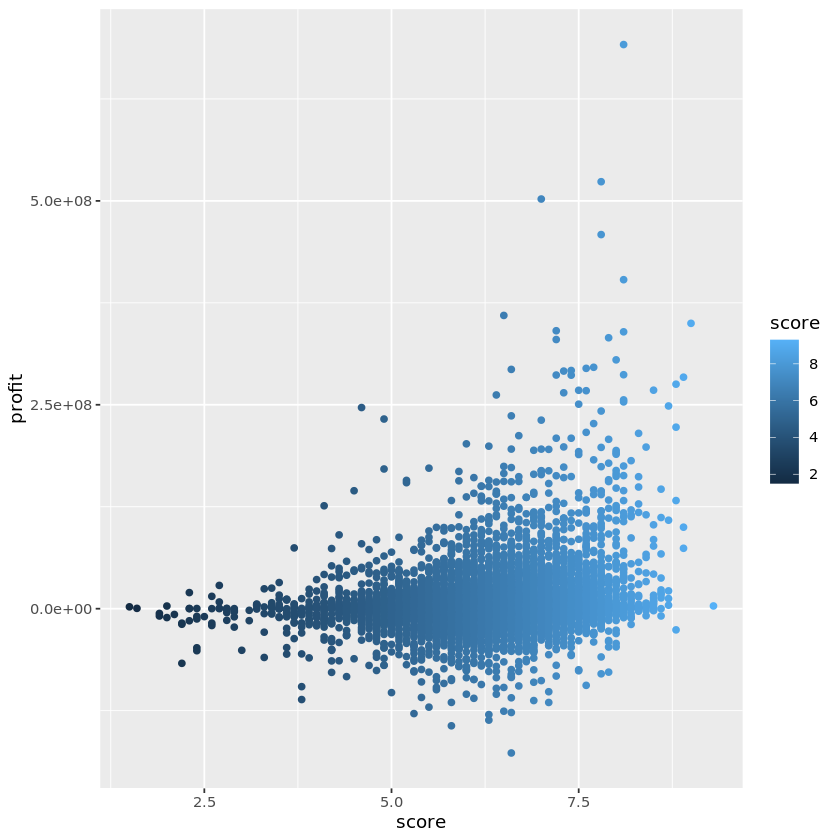

In [98]:
ggplot(data=movies1,aes(x=score,y=profit,col=score))+geom_point()

In [96]:
cor(score,profit)

[1] 0.1966924

Con la gráfica podemos definir que no es así, pues aunque aumente el score o calificación, se mantiene un nivel de ganancias al rededor del mismo nivel y son pocos los casos que generan grandes cantidades de dinero. Un claro ejemplo es el punto con mejor score, él cual sigue la tendencia de generar las mismas ganancias que inclusive la de menor score.

Por lo que los cineastas no deben tomar como una variable significativa el score que les dé la crítica para saber si será rentable; ya que no va en función de sus ganancias la calificación que obtiene la película. Ésto lo podemos confirmar con el análisis de correlación entre ambas variables, pues es muy cercano a cero y nos confirma que no implica que a mayor score mayor ganancia.